In [5]:
# Install libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn 


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("dataset_part_2.csv")
df.head()


,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time,Class
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.07B0003.18,Failure,4 June 2010,18:45,1
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43,1
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44,1
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.07B0006.18,No attempt,8 October 2012,00:35,0
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10,1


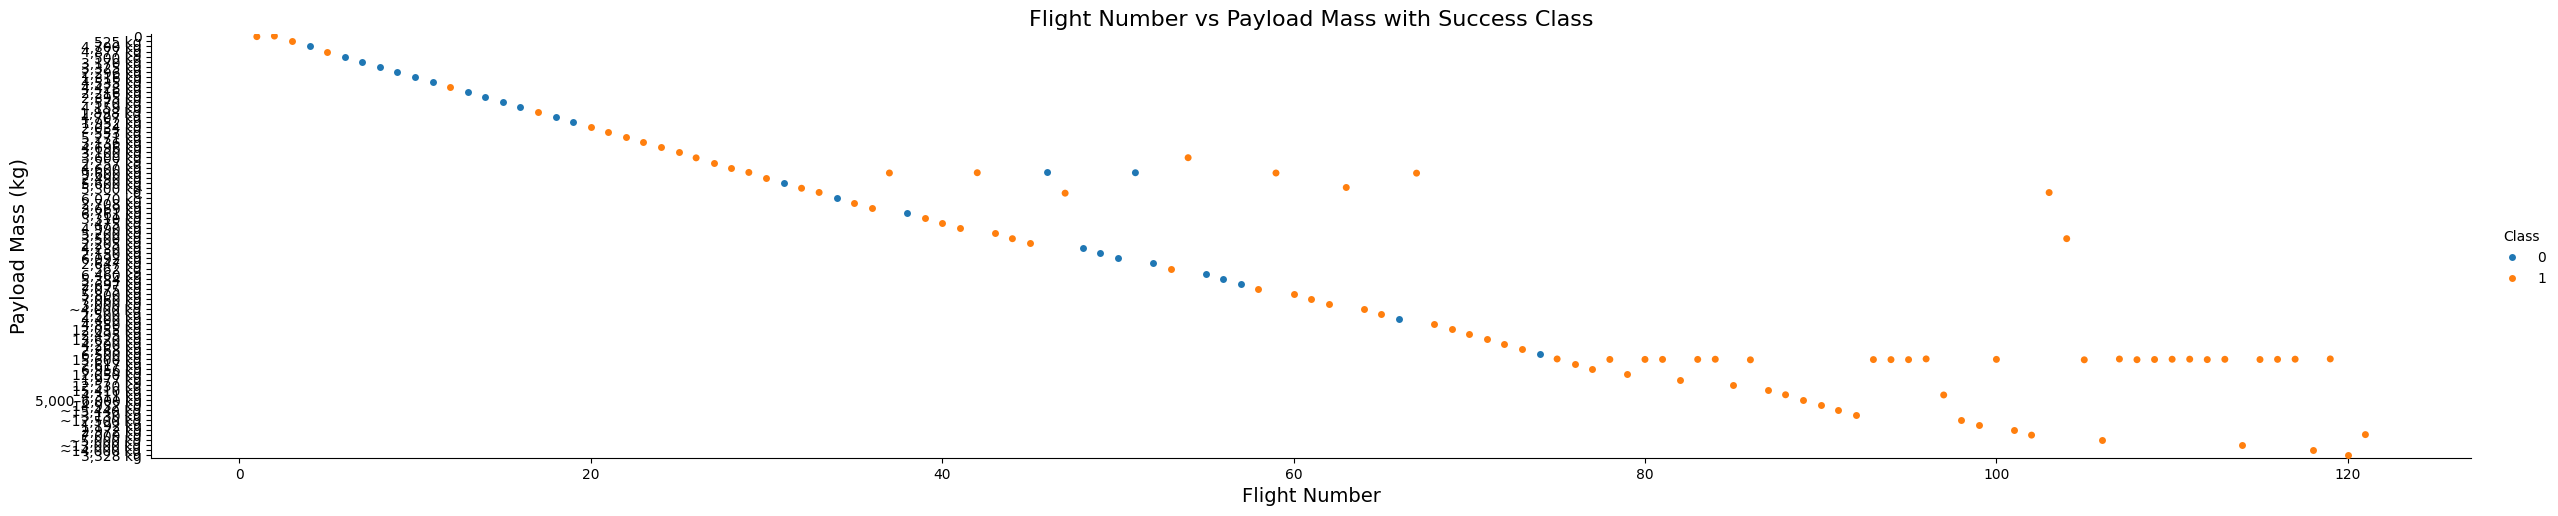

In [12]:
#plot Flight Number vs Payload Mass and Class
sns.catplot(
    data=df, 
    x="Flight No.", 
    y="Payload mass", 
    hue="Class", 
    aspect=5
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Flight Number vs Payload Mass with Success Class", fontsize=16)
plt.show()


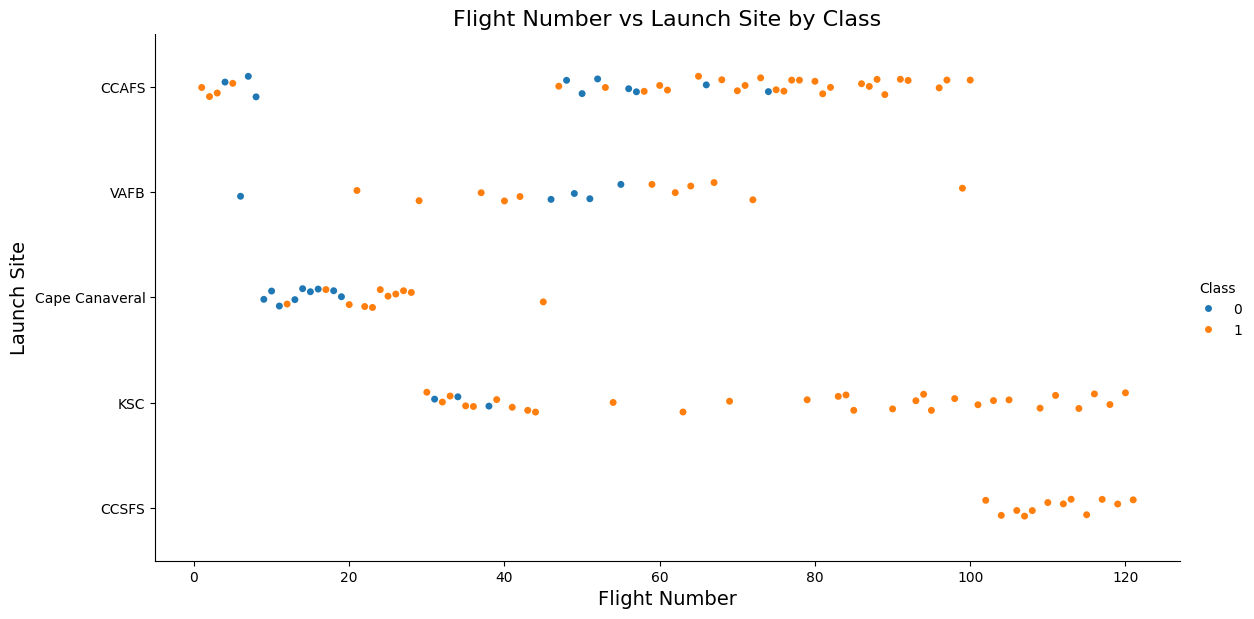

In [11]:
#  Flight Number vs Launch Site
sns.catplot(
    data=df,
    x="Flight No.", 
    y="Launch site", 
    hue="Class", 
    height=6, aspect=2
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site by Class", fontsize=16)
plt.show()


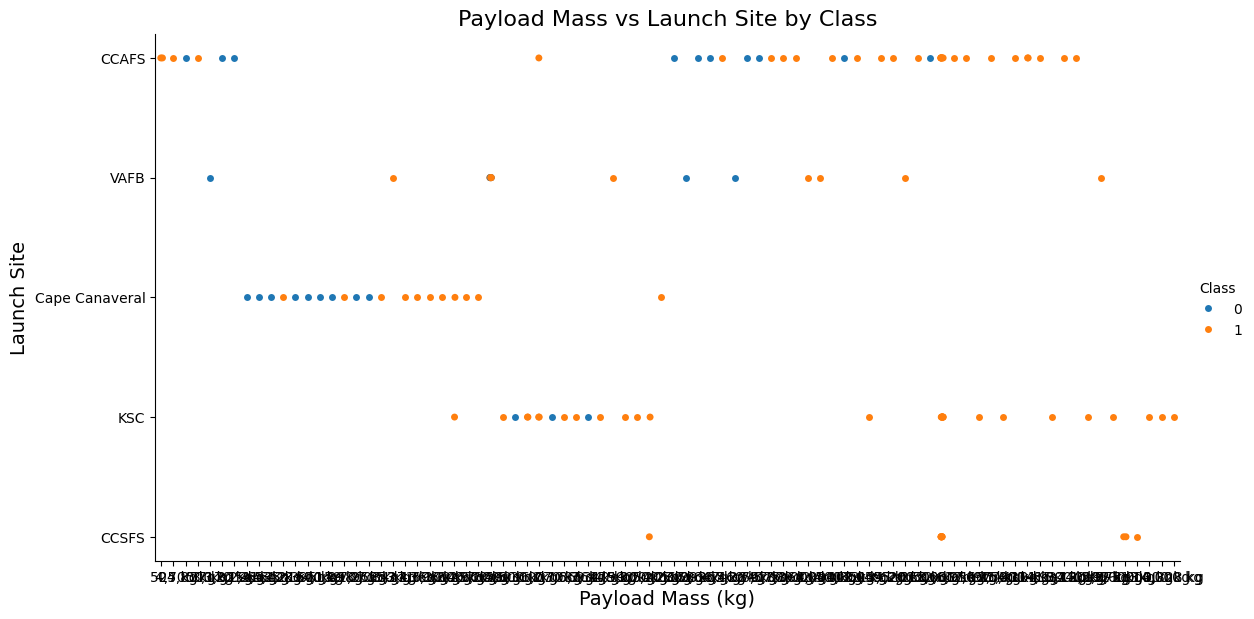

In [15]:
#Payload Mass vs Launch Site
sns.catplot(
    data=df,
    x="Payload mass", 
    y="Launch site", 
    hue="Class", 
    height=6, aspect=2
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Class", fontsize=16)
plt.show()


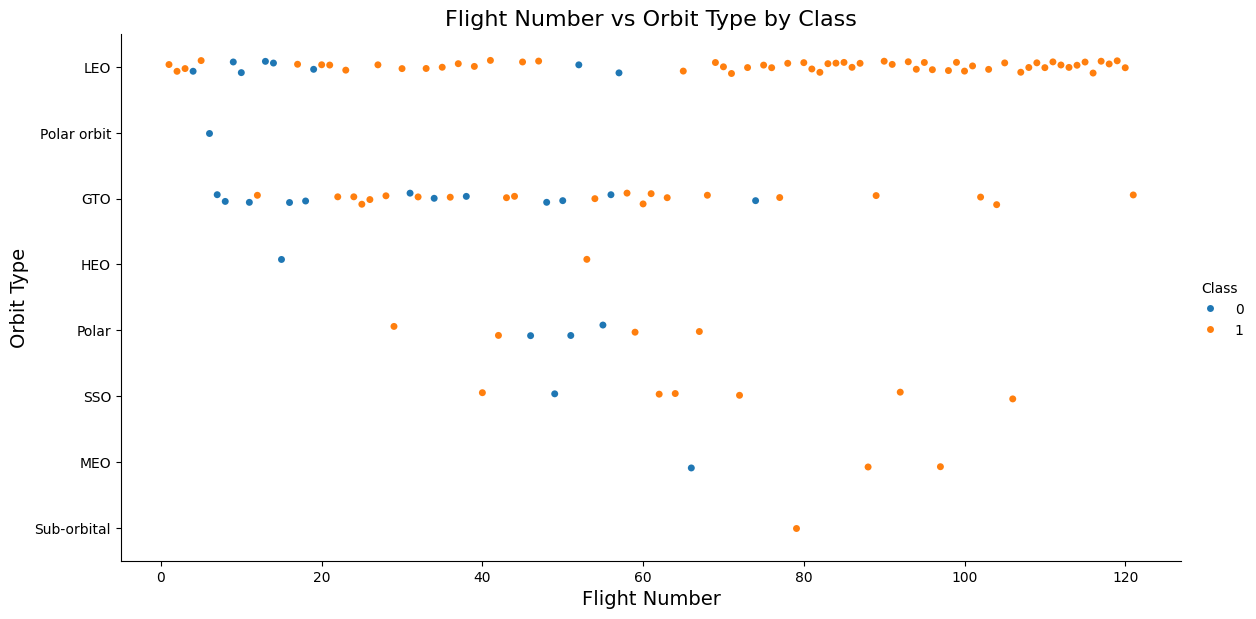

In [16]:
# Flight Number vs Orbit type
sns.catplot(
    data=df,
    x="Flight No.", 
    y="Orbit", 
    hue="Class", 
    height=6, aspect=2
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type by Class", fontsize=16)
plt.show()



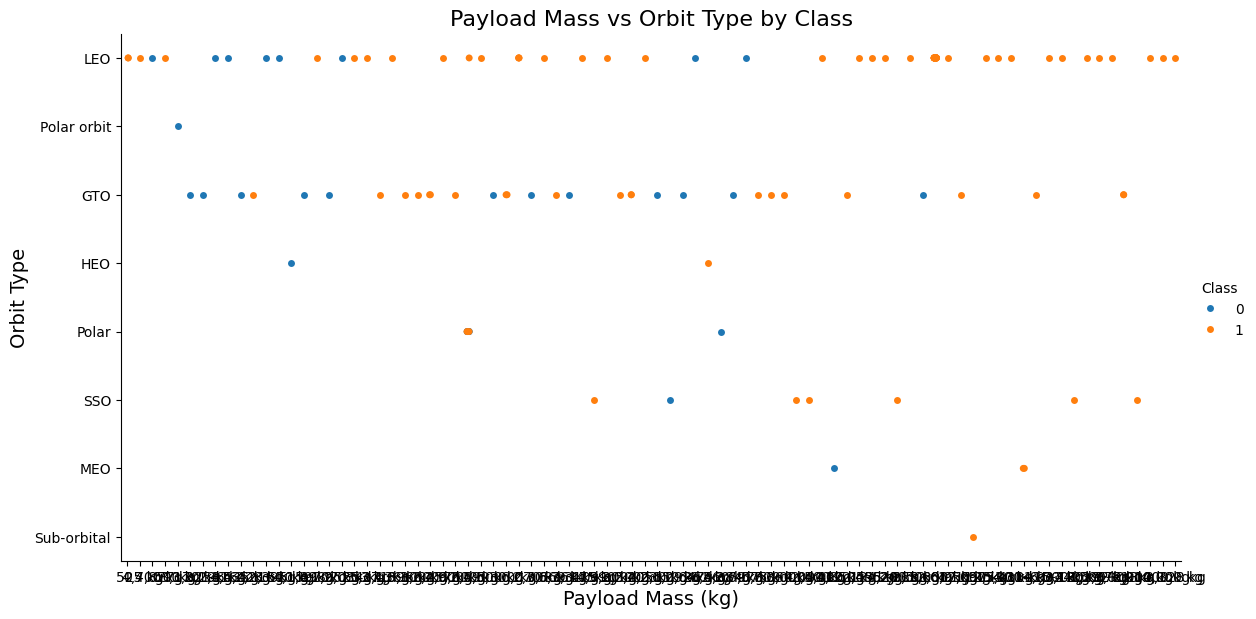

In [17]:
#Payload Mass vs Orbit type
sns.catplot(
    data=df,
    x="Payload mass", 
    y="Orbit", 
    hue="Class", 
    height=6, aspect=2
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type by Class", fontsize=16)
plt.show()


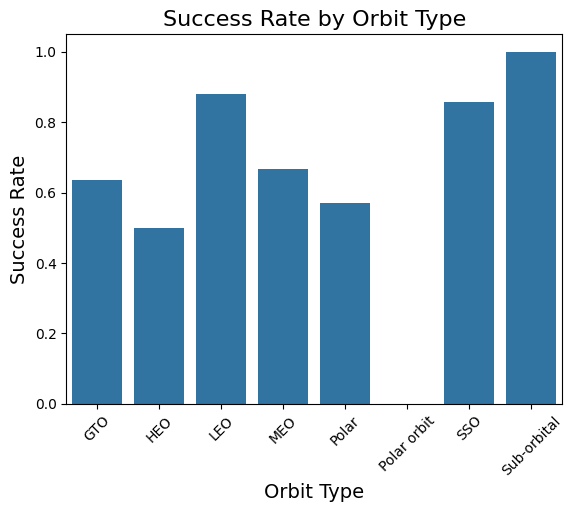

In [18]:
#Success rate by Orbit type
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success.columns = ["Orbit", "Success Rate"]

sns.barplot(data=orbit_success, x="Orbit", y="Success Rate")
plt.xticks(rotation=45)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.show()


In [19]:
#Year-wise success trend
df["Year"] = pd.DatetimeIndex(df["Date"]).year


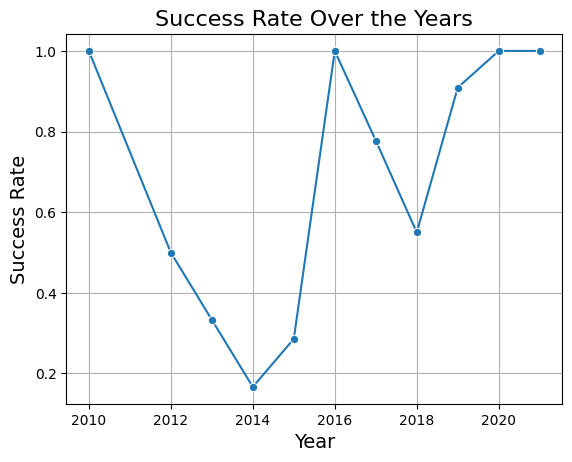

In [20]:
yearly_success = df.groupby("Year")["Class"].mean().reset_index()

sns.lineplot(data=yearly_success, x="Year", y="Class", marker="o")
plt.title("Success Rate Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.grid(True)
plt.show()


In [22]:
#One-hot encode categorical features
features = df[['Flight No.', 'Payload mass', 'Orbit', 'Launch site']]


In [32]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'Launch site'], prefix=['Orbit', 'LaunchSite'])
features_one_hot.head()


,Flight No.,Payload mass,Orbit_GTO,Orbit_HEO,Orbit_LEO,Orbit_MEO,Orbit_Polar,Orbit_Polar orbit,Orbit_SSO,Orbit_Sub-orbital,LaunchSite_CCAFS,LaunchSite_CCSFS,LaunchSite_Cape Canaveral,LaunchSite_KSC,LaunchSite_VAFB
0,1,0,False,False,True,False,False,False,False,False,True,False,False,False,False
1,2,0,False,False,True,False,False,False,False,False,True,False,False,False,False
2,3,525 kg,False,False,True,False,False,False,False,False,True,False,False,False,False
3,4,"4,700 kg",False,False,True,False,False,False,False,False,True,False,False,False,False
4,5,"4,877 kg",False,False,True,False,False,False,False,False,True,False,False,False,False


In [33]:
# Before cleaning
print("Rows before cleaning:", features_one_hot.shape[0])


Rows before cleaning: 121


In [34]:
# Step 1: Remove 'kg', commas, and whitespace
features_one_hot['Payload mass'] = (
    features_one_hot['Payload mass']
    .str.replace('kg', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Step 2: Convert to float, turning invalid values (like 'C') into NaN
features_one_hot['Payload mass'] = pd.to_numeric(features_one_hot['Payload mass'], errors='coerce')

# Step 3: Drop rows with NaN in 'Payload mass' (i.e., the bad values like 'C')
features_one_hot = features_one_hot.dropna(subset=['Payload mass'])

# Step 4: Convert the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')


In [35]:
# After cleaning
print("Rows after cleaning:", features_one_hot.shape[0])


Rows after cleaning: 111


In [36]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)
